In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. 파일 불러오기
sal_data_23 = pd.read_csv('2023_연봉_statiz.csv')
sal_data_24 = pd.read_csv('2024_연봉_statiz.csv')
sal_data_25 = pd.read_csv('2025_연봉_statiz.csv')

In [3]:
# 연도별 데이터프레임 
sal_data_23['연도'] = 2023
sal_data_24['연도'] = 2024
sal_data_25['연도'] = 2025

# 파일 병합하기 
sal_total = pd.concat([sal_data_23, sal_data_24, sal_data_25], ignore_index=True)
sal_total

,선수,연봉(만원),WAR,WAR당 연봉,팀,pid,연도
0,채은성,180000,2.36,76221,한화 이글스,11215,2023
1,최재훈,80000,3.90,20492,한화 이글스,10170,2023
2,스미스,70000,0.09,756875,한화 이글스,15540,2023
3,오그레디,70000,-0.87,-80365,한화 이글스,15541,2023
4,이태양,66000,1.44,45702,한화 이글스,10609,2023
...,...,...,...,...,...,...,...
2558,김주훈,3000,-,-,키움 히어로즈,16129,2025
2559,서유신,3000,-0.24,-12551,키움 히어로즈,15483,2025
2560,박성빈,3000,-,-,키움 히어로즈,15479,2025
2561,이우석,1500,-,-,키움 히어로즈,11360,2025


In [4]:
df = sal_total.copy()
df['연봉(만원)'] = pd.to_numeric(df['연봉(만원)'], errors='coerce')
#df = df.drop('WAR당 연봉', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2563 entries, 0 to 2562
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   선수       2563 non-null   object 
 1   연봉(만원)   2534 non-null   float64
 2   WAR      2563 non-null   object 
 3   WAR당 연봉  2563 non-null   object 
 4   팀        2563 non-null   object 
 5   pid      2563 non-null   int64  
 6   연도       2563 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 140.3+ KB


In [5]:
df['WAR'] = pd.to_numeric(df['WAR'], errors='coerce').fillna(0)
df

,선수,연봉(만원),WAR,WAR당 연봉,팀,pid,연도
0,채은성,180000.0,2.36,76221,한화 이글스,11215,2023
1,최재훈,80000.0,3.90,20492,한화 이글스,10170,2023
2,스미스,70000.0,0.09,756875,한화 이글스,15540,2023
3,오그레디,70000.0,-0.87,-80365,한화 이글스,15541,2023
4,이태양,66000.0,1.44,45702,한화 이글스,10609,2023
...,...,...,...,...,...,...,...
2558,김주훈,3000.0,0.00,-,키움 히어로즈,16129,2025
2559,서유신,3000.0,-0.24,-12551,키움 히어로즈,15483,2025
2560,박성빈,3000.0,0.00,-,키움 히어로즈,15479,2025
2561,이우석,1500.0,0.00,-,키움 히어로즈,11360,2025


In [6]:
# 팀별/전체 연봉순위 파생변수 생성
df['연봉'] = df['연봉(만원)']

# 팀별 연봉순위 (1등 = 가장 연봉 높은 선수)
df['팀연봉순위'] = df.groupby('팀')['연봉'].rank(ascending=False, method='first')

# 전체 연봉순위
df['전체연봉순위'] = df['연봉'].rank(ascending=False, method='first')

# 연봉이 NaN인 선수 삭제
df = df.dropna(subset=['연봉'])
df

,선수,연봉(만원),WAR,WAR당 연봉,팀,pid,연도,연봉,팀연봉순위,전체연봉순위
0,채은성,180000.0,2.36,76221,한화 이글스,11215,2023,180000.0,3.0,12.0
1,최재훈,80000.0,3.90,20492,한화 이글스,10170,2023,80000.0,9.0,94.0
2,스미스,70000.0,0.09,756875,한화 이글스,15540,2023,70000.0,10.0,113.0
3,오그레디,70000.0,-0.87,-80365,한화 이글스,15541,2023,70000.0,11.0,114.0
4,이태양,66000.0,1.44,45702,한화 이글스,10609,2023,66000.0,12.0,128.0
...,...,...,...,...,...,...,...,...,...,...
2557,송지후,3000.0,-0.34,-8727,키움 히어로즈,16130,2025,3000.0,243.0,2527.0
2558,김주훈,3000.0,0.00,-,키움 히어로즈,16129,2025,3000.0,244.0,2528.0
2559,서유신,3000.0,-0.24,-12551,키움 히어로즈,15483,2025,3000.0,245.0,2529.0
2560,박성빈,3000.0,0.00,-,키움 히어로즈,15479,2025,3000.0,246.0,2530.0


In [7]:
# 1. '연도'를 제외한 나머지 컬럼 순서 가져오기
cols = [col for col in df.columns if col != '연도']

# 2. 맨 마지막에 '연도'를 붙이기
cols.append('연도')

# 3. 새로운 순서로 데이터프레임 재정렬
df = df[cols]
df

,선수,연봉(만원),WAR,WAR당 연봉,팀,pid,연봉,팀연봉순위,전체연봉순위,연도
0,채은성,180000.0,2.36,76221,한화 이글스,11215,180000.0,3.0,12.0,2023
1,최재훈,80000.0,3.90,20492,한화 이글스,10170,80000.0,9.0,94.0,2023
2,스미스,70000.0,0.09,756875,한화 이글스,15540,70000.0,10.0,113.0,2023
3,오그레디,70000.0,-0.87,-80365,한화 이글스,15541,70000.0,11.0,114.0,2023
4,이태양,66000.0,1.44,45702,한화 이글스,10609,66000.0,12.0,128.0,2023
...,...,...,...,...,...,...,...,...,...,...
2557,송지후,3000.0,-0.34,-8727,키움 히어로즈,16130,3000.0,243.0,2527.0,2025
2558,김주훈,3000.0,0.00,-,키움 히어로즈,16129,3000.0,244.0,2528.0,2025
2559,서유신,3000.0,-0.24,-12551,키움 히어로즈,15483,3000.0,245.0,2529.0,2025
2560,박성빈,3000.0,0.00,-,키움 히어로즈,15479,3000.0,246.0,2530.0,2025


### 팀별 연봉 분포 시각화

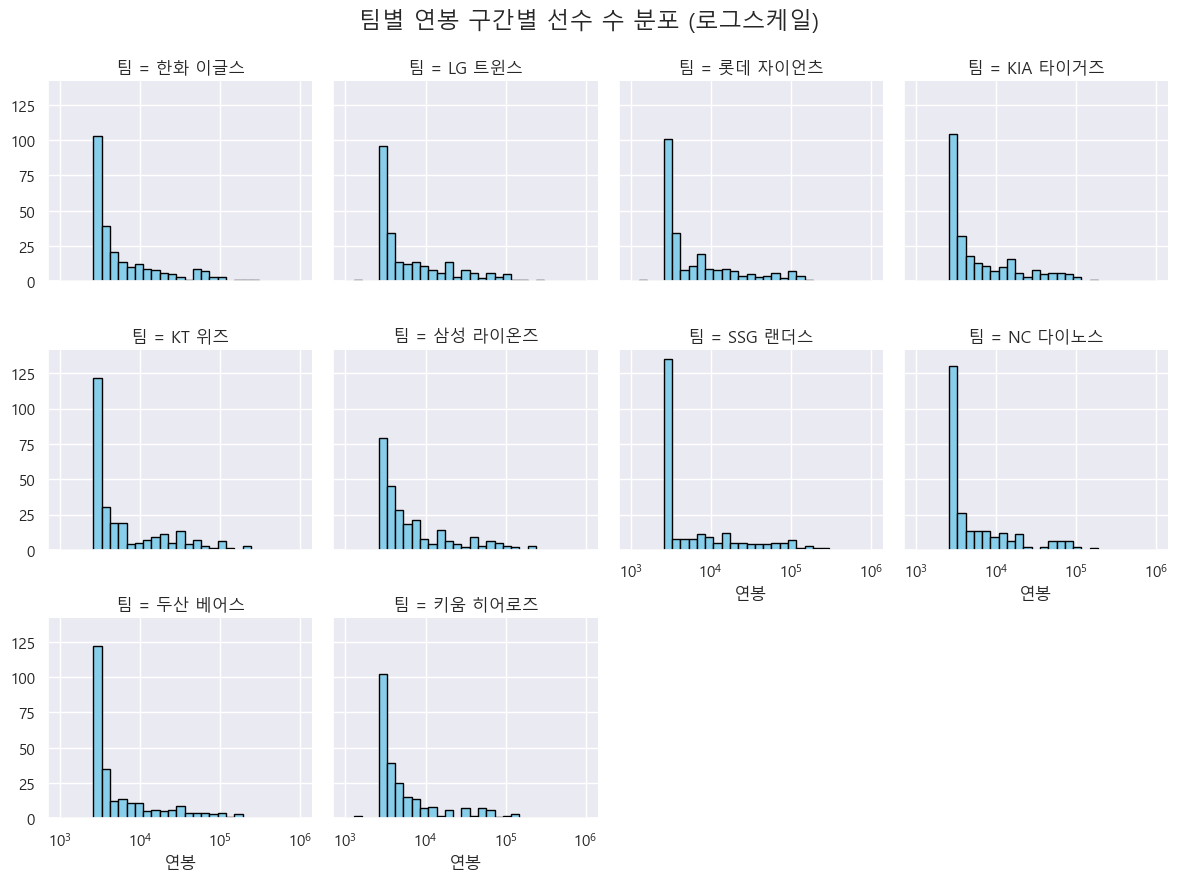

In [9]:
#g = sns.FacetGrid(df, col="팀", col_wrap=4, height=3, sharex=True, sharey=True)
#g.map(plt.hist, "연봉", bins=20, color="skyblue", edgecolor="black")
#g.fig.subplots_adjust(top=0.9)
#g.fig.suptitle("팀별 연봉 구간별 선수 수 분포")
#plt.show()

# log스케일 적용 버전
g = sns.FacetGrid(df, col="팀", col_wrap=4, height=3, sharex=True, sharey=True)
g.map(plt.hist, "연봉", bins=np.logspace(3, 6, 30), color="skyblue", edgecolor="black")
g.set(xscale="log")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("팀별 연봉 구간별 선수 수 분포 (로그스케일)")
plt.show()

- 대부분의 팀에서 **연봉 5,000만원 미만** 선수 비율이 매우 높다.
- **억대 연봉자**(1억원 이상)는 각 팀별로 **1~2명 수준**으로 극소수에 불과하다.
- **중위권 연봉자(5천~1억원)**의 분포는 팀별로 약간씩 차이가 있으나, 전체적으로 큰 차이는 없다.
- **상위 구간(3억원~5억원)** 선수는 주로 프랜차이즈 스타, FA, 외국인 선수에 집중된다.
- 연봉 분포는 **한쪽(저연봉)에 쏠린 비대칭 구조**를 보이며, 팀 간 격차보다는 **KBO 전체의 구조적 특성**이 더 크게 나타난다.

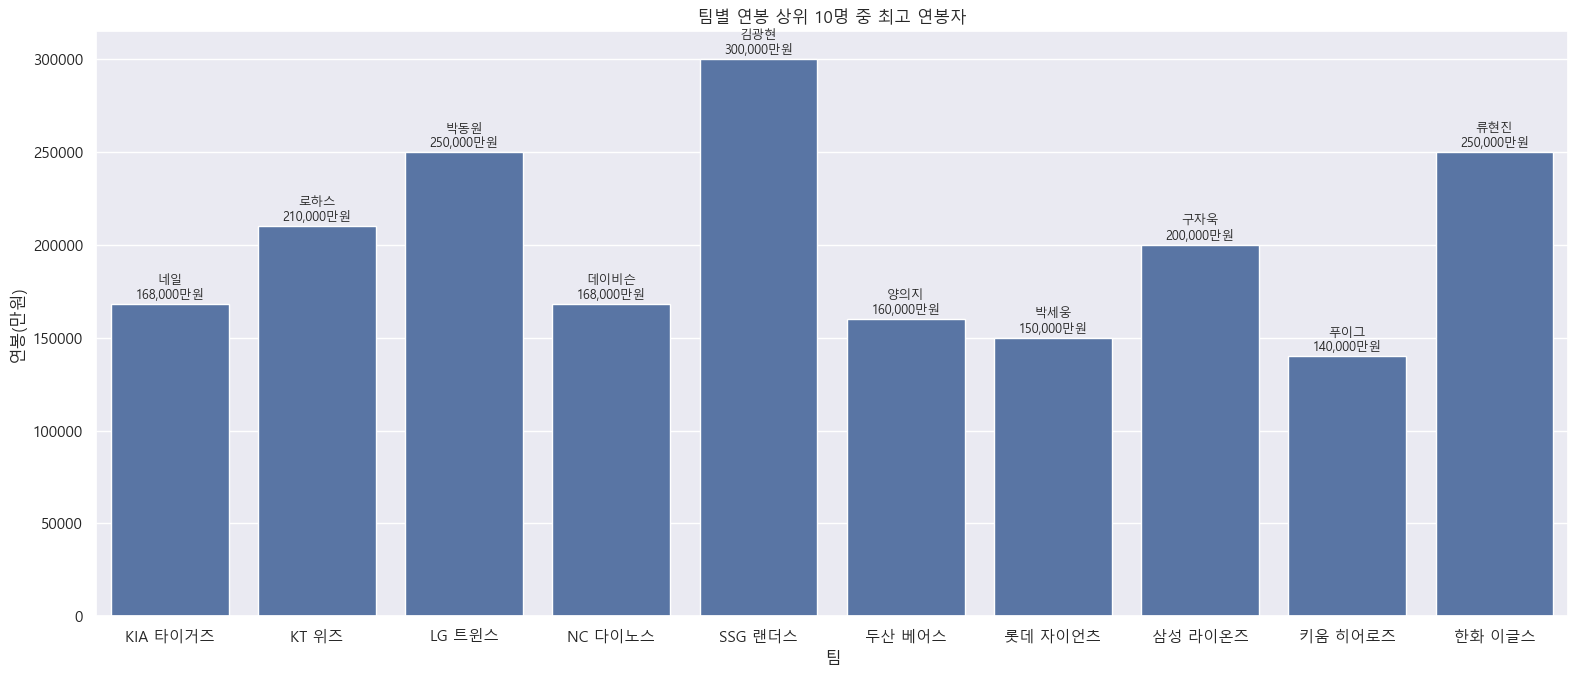

In [11]:
top_n = 10  # 상위 N명
df_top = df.groupby('팀').apply(lambda x: x.nlargest(top_n, '연봉')).reset_index(drop=True)

# 각 팀별 최고 연봉자만 추출
df_max = df_top.groupby('팀').apply(lambda x: x.loc[x['연봉'].idxmax()]).reset_index(drop=True)

plt.figure(figsize=(16, 7))
ax = sns.barplot(x='팀', y='연봉', data=df_max, ci=None)

# 바 위에 이름과 연봉 라벨 표시
for i, row in df_max.iterrows():
    label = f"{row['선수']}\n{int(row['연봉']):,}만원"
    ax.text(i, row['연봉'] + 1000, label, ha='center', va='bottom', fontsize=9)

plt.title(f'팀별 연봉 상위 {top_n}명 중 최고 연봉자')
plt.xlabel('팀')
plt.ylabel('연봉(만원)')
plt.tight_layout()
plt.show()

### 팀별 연봉 상위 10명 중 최고 연봉자 분석

- 대부분의 팀에서 **최고 연봉자가 1.5억~2.5억 사이**에 분포하고 있으며, **3억원 이상은 단 1명(김광현)**에 불과하다.
- **SSG 김광현(3억 원)**은 리그 내에서 **유일하게 3억 원을 돌파한 선수**로, 프랜차이즈 스타이자 대표급 투수의 상징적인 존재임.
- **2.5억 원**을 받는 LG 박동원(키움에서 LG로 이적)과 한화 류현진(메이저리그에서 복귀) 역시, 팀의 주축 선수이자 **FA 혹은 해외파 출신**이라는 공통점이 있다.
- 반면 **롯데, 키움, 두산, NC** 등은 최고 연봉자도 1.5억~1.7억 수준에 머물러 있어, **고연봉자 집중 현상이 적거나 부재**한 모습이다.
- **외국인 선수가 팀 내 최고 연봉자**인 경우도 다수 포착되며, 이는 **팀 전력의 외국인 의존도**와 연계 가능성 있음.
- 각 팀의 최고 연봉자만 비교했을 때는 **팀 간 큰 연봉 격차는 존재하지 않지만**, 최고 금액과 그 외 선수 간의 **내부 편차**가 존재할 가능성이 높음.

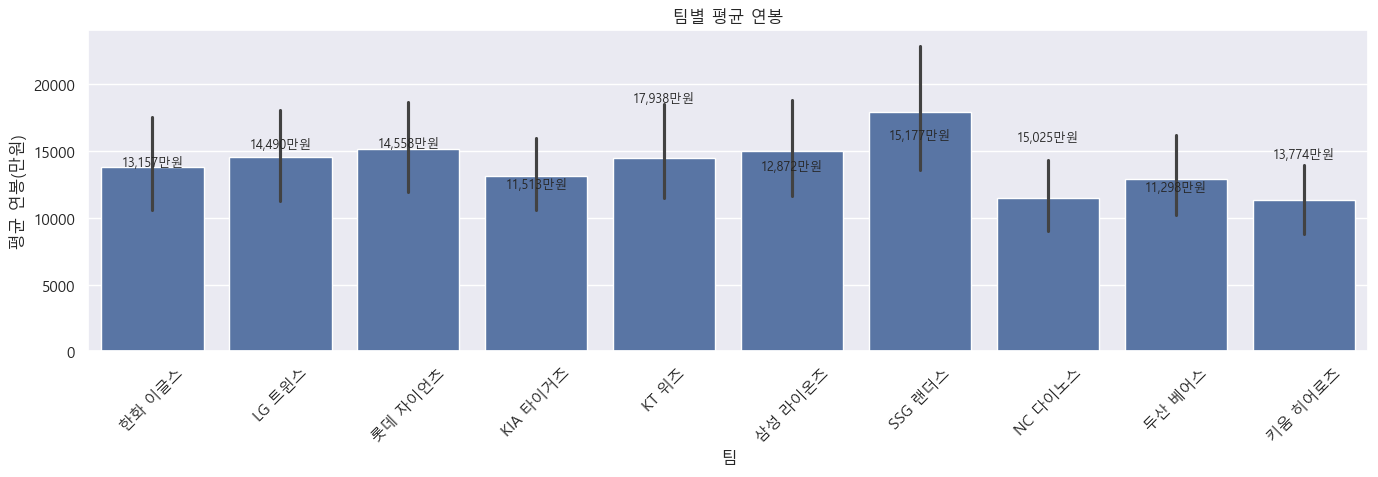

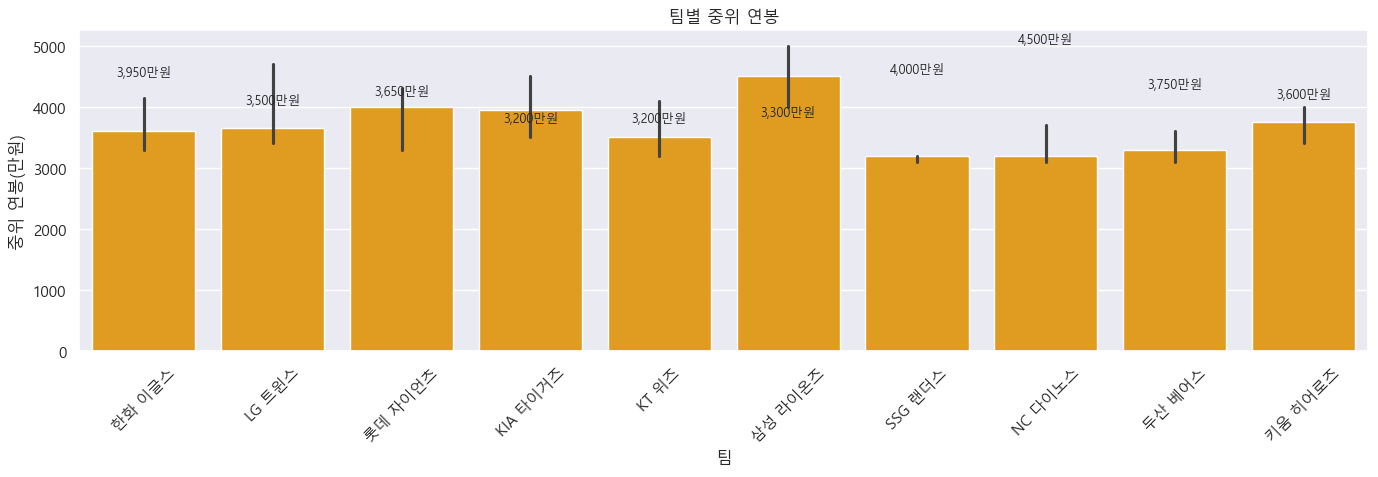

In [13]:
# 평균
plt.figure(figsize=(14, 5))
ax = sns.barplot(x='팀', y='연봉', data=df, estimator='mean', ci=95)

# 평균값 계산 (그래프 위에 표시용)
mean_per_team = df.groupby('팀')['연봉'].mean().round(1)

# 바 위에 숫자 표시
for i, team in enumerate(mean_per_team.index):
    value = mean_per_team[team]
    ax.text(i, value + 500, f'{int(value):,}만원', ha='center', va='bottom', fontsize=9)

#plt.figure(figsize=(14, 5))
#sns.barplot(x='팀', y='연봉', data=df, estimator='mean')
plt.title('팀별 평균 연봉')
plt.ylabel('평균 연봉(만원)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 중앙값
plt.figure(figsize=(14, 5))
ax = sns.barplot(x='팀', y='연봉', data=df, estimator='median', color='orange')

# 중위값 계산
median_per_team = df.groupby('팀')['연봉'].median().round(1)

# 바 위에 텍스트로 중위값 표시
for i, team in enumerate(median_per_team.index):
    value = median_per_team[team]
    ax.text(i, value + 500, f'{int(value):,}만원', ha='center', va='bottom', fontsize=9)

#sns.barplot(x='팀', y='연봉', data=df, estimator='median', color='orange')
plt.title('팀별 중위 연봉')
plt.ylabel('중위 연봉(만원)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 팀별 평균 연봉 분석

- **SSG 랜더스(15,177만원)**, **KT 위즈(17,938만원)**, **NC 다이노스(15,025만원)**는 평균 연봉이 상대적으로 높게 나타난 팀이다.
- 특히 **KT 위즈는 1인 평균 연봉이 1.79억원**으로 리그 최고 수준이다.
- 반면, **KIA 타이거즈(11,515만원)**, **두산 베어스(11,295만원)**는 평균 연봉이 비교적 낮은 수준에 속한다.
- **대부분의 팀이 1.3억~1.5억 수준**에 밀집해 있으며, 연봉 구조가 비교적 유사함을 알 수 있다.
- **검은 선(신뢰구간)**이 길수록 해당 팀 내 연봉 편차가 크다는 것을 의미하며, 예를 들어 **롯데, LG, 삼성** 등은 평균값 주변 편차가 큰 편이다.
- 반대로 **KIA, 키움, 두산**은 신뢰구간이 짧아 **연봉 분포가 상대적으로 균등하게 구성**되어 있음을 보여준다.

### 팀별 중위 연봉 분석

- **한화 이글스(3,950만원)**는 중위 연봉이 가장 높은 팀으로, 평균 연봉 그래프에서도 상위권에 있었던 점과 일치한다.
- **삼성 라이온즈(3,300만원)**는 평균 연봉은 중상위권이었지만, 중위 연봉 역시 비교적 높아 **연봉 구조가 상위 일부에 쏠리지 않고 고르게 분포**돼 있음을 보여준다.
- 반면, **KIA 타이거즈(3,200만원)**, **KT 위즈(3,200만원)**는 평균 연봉에 비해 중위 연봉이 낮은 편으로, **상위 소수 고액 연봉자가 평균을 끌어올린 구조**일 가능성이 높다.
- **SSG 랜더스(4,000만원)**는 평균 연봉은 가장 높은 수준이었지만, 중위 연봉은 생각보다 낮은 편 → **연봉 격차가 크고 상위 쏠림 현상이 강함**을 시사.
- 전반적으로 **중위 연봉은 3,200만원 ~ 3,950만원 범위**에 대부분 분포해 있으며, 팀 간 차이는 평균보다 작고 비교적 균형적이다.
- 
### 평균 연봉 vs 중위 연봉 비교 인사이트

- **SSG 랜더스**
  - 평균 연봉: 15,177만원 (1위권), 중위 연봉: 4,000만원
  - ✅ 상위 몇 명의 고액 연봉자가 전체 평균을 끌어올림
  - → **연봉 구조가 상위에 매우 집중된 팀**

- **KT 위즈**
  - 평균 연봉: 17,938만원 (최고), 중위 연봉: 3,200만원
  - ✅ 상위 소수 고연봉자 중심, 하위 연봉자와 격차 큼
  - → **연봉 불균형이 가장 큰 팀 중 하나**

- **한화 이글스**
  - 평균 연봉: 13,157만원, 중위 연봉: 3,950만원 (중위 연봉 1위)
  - ✅ 평균은 중간 정도지만, 중위 연봉이 높음
  - → **상위·하위 격차가 작고, 전반적으로 고른 연봉 분포**

- **삼성 라이온즈**
  - 평균 연봉: 12,872만원, 중위 연봉: 3,300만원
  - ✅ 평균·중위 연봉 모두 중상위권
  - → **연봉 분포가 비교적 균형적인 팀**

- **KIA 타이거즈 / 두산 베어스**
  - 평균 연봉: 각각 11,515만원 / 11,295만원
  - 중위 연봉: 각각 3,200만원 / 3,750만원
  - ✅ 평균 연봉은 낮은데, 중위 연봉은 상대적으로 안정적
  - → **상위 고액 선수 비율이 적고, 연봉 구조가 평탄한 팀**

---

### 종합 인사이트

- 평균과 중위 연봉의 차이가 클수록 → **소수 고액 연봉자가 있는 불균형 구조**
- 두 값이 비슷하면 → **전체적으로 고른 연봉 분포**
- **SSG, KT**는 평균에 비해 중위값이 낮아 **상위 집중형 구조**
- **한화, 삼성**은 중위값이 높아 **균형적이고 안정적인 구조**

→ 단순 평균만 보면 팀 내 연봉 구조를 오해할 수 있으므로, **평균과 중위값을 함께 봐야 선수단 구성 특성을 더 정확히 파악할 수 있음**